# **Análise Exploratória: Relações entre Música e Saúde Mental**

<p align="center">
   <b><font size='5'>Work in Progress 🛠️</b>
</p>

# Objetivos da Análise:

> Nesse projeto, irei realizar uma análise exploratória de um [Dataset](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results) que contém dados de uma pesquisa relacionada a "Music Therapy", onde se buscou compreender quais as correlações (se existirem) entre gêneros musicais preferidos pelos participantes e sua saúde mental.
> 
> Em mais detalhes, pretendo concluir essa análise seguindo alguns passos:
> - Checar as características gerais dos dados, como formato, tipo dos dados, quantidade de valores nulos e outliers (se existirem), etc;
> - Realizar a limpeza e tratamento necessários dos dados;
> - Utilizar de visualizações gráficas para gerar insights acerca dos dados;
>     - Para as visualizações, o foco desse projeto é aprimorar meus conhecimentos e aplicações principalmente da biblioteca Seaborn, porém Matplotlib também será utilizado em conjunto para modificações gráficas.
>
> Após a etapa de limpeza serão definidas algumas questões e propostas de análise, que irão ser abordadas na etapa de visualização.

## Importando Pacotes e Conhecendo o Dataset

In [196]:
# Importando as bibliotecas que serão utilizadas para a realização dos trabalhos:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo parâmetros de tamanho das figuras do Seaborn:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="darkgrid")

print('Pacotes prontos!')

Pacotes prontos!


In [54]:
# Criando Dataframe:
data = pd.read_csv('data/mxmh_survey_results.csv')

In [55]:
# Sample dos primeiros 5 registros:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [56]:
# Sample aleatória:
data.sample(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
649,9/13/2022 7:06:03,26.0,Spotify,3.0,No,No,No,Metal,Yes,No,...,Rarely,Sometimes,Very frequently,Rarely,1.0,3.0,10.0,0.0,No effect,I understand.
50,8/28/2022 12:37:17,17.0,Apple Music,2.0,Yes,Yes,No,EDM,Yes,No,...,Sometimes,Sometimes,Very frequently,Rarely,0.0,0.0,0.0,0.0,Improve,I understand.
417,8/30/2022 10:10:44,32.0,Spotify,12.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Sometimes,Rarely,Never,Never,9.0,4.0,4.0,4.0,Improve,I understand.
101,8/28/2022 15:22:00,25.0,I do not use a streaming service.,0.5,No,Yes,No,Classical,No,No,...,Rarely,Never,Very frequently,Sometimes,1.0,1.0,3.0,1.0,Improve,I understand.
346,8/29/2022 9:26:07,33.0,YouTube Music,0.5,Yes,Yes,No,Rock,No,No,...,Never,Never,Sometimes,Rarely,7.0,9.0,4.0,6.0,Improve,I understand.


## Características dos Dados

In [57]:
# Checando nomes das colunas do Dataset:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

Para poder termos uma compreensão clara de todas as variáveis presentes no Dataset, realizaremos uma definição de cada uma a seguir.
- As definições das variáveis foram retiradas diretamente da página do Kaggle onde foram coletados os dados.

| <p align='center'>**Variável**</p>| <p align='center'>**Conteúdo**</p>                                                  |
|-----------------------------------|-------------------------------------------------------------------------------------|
| *`Timestamp`*                     | Data e Hora de quando a pesquisa foi respondida pelo participante.                  |
| *`Age`*                           | Idade do participante.                                                              |
| *`Primary Streaming Service`*     | Qual o aplicativo de música principal que o participante utiliza.                   |
| *`Hours per Day`*                 | Número de horas que o participante escuta de música por dia.                        |
| *`While Working`*                 | O participante escuta música enquanto trabalha?                                     |
| *`Instrumentalist`*               | O participante toca algum instrumento musical regularmente?                         |
| *`Composer`*                      | O participante é compositor de música?                                              |
| *`Fav Genre`*                     | Gênero musical favorito/mais escutado do participante.                              |
| *`Exploratory`*                   | O participante ativamente busca conhecer gêneros diferentes de música?              |
| *`Foreign Languages`*             | O participante regularmente escuta músicas em línguas na qual não possuí fluência?  |
| *`BPM`*                           | "Beats per Minute" (tempo) do gênero musical favorito do participante.              |
| *`Frequency [Classical]`*         | Quão frequentemente o participante escuta música Clásica.                           |
| *`Frequency [Country]`*           | Quão frequentemente o participante escuta música Country.                           |
| *`Frequency [EDM]`*               | Quão frequentemente o participante escuta música EDM.                               |
| *`Frequency [Folk]`*              | Quão frequentemente o participante escuta música folk.                              |
| *`Frequency [Gospel]`*            | Quão frequentemente o participante escuta música Gospel.                            |
| *`Frequency [Hip Hop]`*           | Quão frequentemente o participante escuta Hip Hop.                                  |
| *`Frequency [Jazz]`*              | Quão frequentemente o participante escuta Jazz.                                     |
| *`Frequency [K Pop]`*             | Quão frequentemente o participante escuta K Pop.                                    |
| *`Frequency [Latin]`*             | Quão frequentemente o participante escuta música Latina.                            |
| *`Frequency [Lofi]`*              | Quão frequentemente o participante escuta Lofi.                                     |
| *`Frequency [Metal]`*             | Quão frequentemente o participante escuta Metal.                                    |
| *`Frequency [Pop]`*               | Quão frequentemente o participante escuta música Pop.                               |
| *`Frequency [R&B]`*               | Quão frequentemente o participante escuta R&B (Rhythm and Blues).                   |
| *`Frequency [Rap]`*               | Quão frequentemente o participante escuta Rap.                                      |
| *`Frequency [Rock]`*              | Quão frequentemente o participante escuta Rock.                                     |
| *`Frequency [Video Game Music]`*  | Quão frequentemente o participante escuta músicas de Video Game.                    |
| *`Anxiety`*                       | Nível de ansiedade (classificada de 0-10) reportado pelo participante.              |
| *`Drepession`*                    | Nível de depressão (classificada de 0-10) reportado pelo participante.              |
| *`Insomnia`*                      | Nível de insônia (classificada de 0-10) reportado pelo participante.                |
| *`OCD`*                           | Nível de OCD (TOC) (classificada de 0-10) reportado pelo participante.              |
| *`Music Effects`*                 | Música melhoram ou pioram a saúde mental do participante?                           |
| *`Permissions`*                   | Permissões concedidas pelos participantes para a publicação dos dados.              |

In [58]:
# Shape:
data.shape

(736, 33)

O Dataset contém **736 registros** em **33 variáveis** diferentes.

In [59]:
# Dividindo as colunas em duas variáveis para facilitar a visualização
# utilizando o comando .info() a seguir:
columns_1 = [
    'Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
    'While working', 'Instrumentalist', 'Composer', 'Fav genre',
    'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
    'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
    'Frequency [Gospel]', 'Frequency [Hip hop]'
    ]

columns_2 = [
    'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
    'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
    'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
    'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects', 'Permissions'
    ]

In [60]:
# Visualizando informações das primeiras 17 colunas:
data[columns_1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  736 non-null    object 
 1   Age                        735 non-null    float64
 2   Primary streaming service  735 non-null    object 
 3   Hours per day              736 non-null    float64
 4   While working              733 non-null    object 
 5   Instrumentalist            732 non-null    object 
 6   Composer                   735 non-null    object 
 7   Fav genre                  736 non-null    object 
 8   Exploratory                736 non-null    object 
 9   Foreign languages          732 non-null    object 
 10  BPM                        629 non-null    float64
 11  Frequency [Classical]      736 non-null    object 
 12  Frequency [Country]        736 non-null    object 
 13  Frequency [EDM]            736 non-null    object 

In [61]:
# Informações das últimas 16 colunas:
data[columns_2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frequency [Jazz]              736 non-null    object 
 1   Frequency [K pop]             736 non-null    object 
 2   Frequency [Latin]             736 non-null    object 
 3   Frequency [Lofi]              736 non-null    object 
 4   Frequency [Metal]             736 non-null    object 
 5   Frequency [Pop]               736 non-null    object 
 6   Frequency [R&B]               736 non-null    object 
 7   Frequency [Rap]               736 non-null    object 
 8   Frequency [Rock]              736 non-null    object 
 9   Frequency [Video game music]  736 non-null    object 
 10  Anxiety                       736 non-null    float64
 11  Depression                    736 non-null    float64
 12  Insomnia                      736 non-null    float64
 13  OCD  

**Primeiras 17 colunas (columns_1):**

> Sobre Nulos:
> - Algumas colunas possuem poucos valores faltantes;
>    
> - Coluna `BPM` é a que possuí mais valores nulos.
>
> Sobre Data Types:
> - Coluna `Timestamp` não está em um formato adequado. Além disso, ela não será relevante para as análises.
>
> - Coluna `Age` não tem motivo para estar em float. Será transformada em int;
> 
> - Coluna `BPM` está em float sendo que músicas são produzidas utilizando BPM's inteiros;

**Últimas 16 colunas (columns_2):**

> Sobre Nulos:
> - Apenas a coluna `Music effects` possui valores nulos.
>
> Sobre Data types:
> - As colunas `Anxiety`, `Depression`, `Insomnia` e `OCD` estão em float. Adiante irei checá-las em busca de valores float, não os encontrando, passarei todas para int;
>
> - A coluna `Permissions` não tem relevância para as análises que serão realizadas.

In [62]:
# Checando se existem valores float nas colunas mencionadas acima:
tables = {
    'Anxiety': list(data['Anxiety'].unique()),
    'Depression': list(data['Depression'].unique()),
    'Insomnia': list(data['Insomnia'].unique()),
    'OCD': list(data['OCD'].unique())
}

print('-='*50)
for column, values in tables.items():
    print(f'{column:11} --> {values}')
print('-='*50)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Anxiety     --> [3.0, 7.0, 9.0, 8.0, 4.0, 5.0, 2.0, 1.0, 6.0, 10.0, 0.0, 7.5]
Depression  --> [0.0, 2.0, 7.0, 8.0, 3.0, 1.0, 4.0, 5.0, 9.0, 10.0, 6.0, 3.5]
Insomnia    --> [1.0, 2.0, 10.0, 3.0, 5.0, 7.0, 6.0, 0.0, 4.0, 8.0, 9.0, 3.5]
OCD         --> [0.0, 1.0, 2.0, 3.0, 9.0, 7.0, 4.0, 6.0, 10.0, 5.0, 8.0, 8.5, 5.5]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Como existem valores float, não iremos alterar os Data Types dessas colunas. No entanto, iremos realizar uma categorização desses valores para facilitar as análises posteriores. Por exemplo:

- De valor X até valor Y: Condição Leve
- De valor X2 até valor Y2: Condição Moderada
- De valor X3 até valor Y3: Condição Grave

Esse processo será realizado na etapa de limpeza e tratamento dos dados.

In [63]:
# Usando método describe nas colunas numéricas:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


Com essas informações, podemos ter alguns insights sobre os dados e suas distribuição:

- `Age`: Temos registros de pessoas que variam entre 10 e 89 anos de idade na pesquisa;

- `Hours per day`: O registro máximo dessa coluna indica um dado peculiar, alguém relatou ouvir música 24 horas por dia. Esse caso será estudado com mais detalhe buscando compreender a situação;

- `BPM`: Claramente temos a presença de outliers, o valor máximo é de 999999999;

Também iremos checar as características das variáveis categóricas no dataset:

In [64]:
# Usando método describe nas colunas categóricas:
data.describe(exclude='number').T

,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


Algumas características que podemos identificar:

- O streaming service mais utilizado é o **Spotify**;

- O gênero favorito mais relatado na pesquisa é **Rock**;

- Os gêneros mais frequentemente ouvidos pelos participantes da pesquisa são **POP** e **Rock**;

- A maioria dos participantes relataram que a música **melhora** sua saúde mental.

## Boxplots: Checando Outiliers

Como observado utilizando o método .describe(), temos três colunas em particular que merecem uma atenção mais detalhada: 
- `Hours per Day`: relato de alguém que escuta música 24 horas por dia;

- `BPM`: Valor máximo da coluna não corresponde aos outros.

- `Age`: 75% dos dados vaõ até 28 anos de idade, porém o máximo registrado é de 89.

Para termos uma visualização melhor delas, iremos plotar boxplots em busca desses outliers e também, utilizar o método .loc[] para identificarmos esses registros.

### Coluna `Hours per Day`

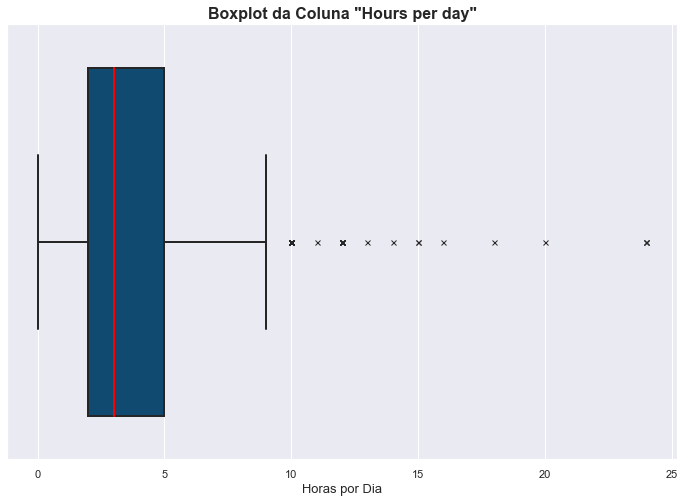

In [65]:
# Plotando:
sns.boxplot(data=data, x='Hours per day', flierprops={"marker": "x"}, 
            color='#004d80', medianprops={"color": "red"}, linewidth=2)

plt.title('Boxplot da Coluna "Hours per day"', loc="center", 
           fontsize=16, fontweight='bold')
           
plt.xlabel('Horas por Dia', fontsize=13)
plt.show()

In [66]:
# Printando a quantidade de registros que constam acima de 12 horas ouvindo música:
print('Registros constando mais de 12 horas ouvindo música:')
print(f'{len(data[data["Hours per day"] > 12])} entradas.')
print("{:.2f}%".format((len(data[data['Hours per day'] > 12]) / data.shape[0]) * 100))

Registros constando mais de 12 horas ouvindo música:
10 entradas.
1.36%


In [67]:
# Visualizando esses registros:
hpd_outliers_viz = data.query('`Hours per day` > 12')
hpd_outliers_viz

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
18,8/27/2022 23:40:55,17.0,Spotify,24.0,Yes,No,No,Rap,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,7.0,5.0,0.0,3.0,Improve,I understand.
290,8/29/2022 2:46:27,27.0,Spotify,20.0,Yes,No,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Sometimes,8.0,10.0,10.0,8.0,No effect,I understand.
347,8/29/2022 9:42:23,18.0,Spotify,16.0,Yes,No,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,3.0,2.0,5.0,6.0,Improve,I understand.
359,8/29/2022 11:02:29,16.0,Spotify,15.0,Yes,Yes,Yes,EDM,Yes,No,...,Never,Very frequently,Very frequently,Sometimes,8.0,10.0,9.0,2.0,Improve,I understand.
366,8/29/2022 12:32:30,16.0,Spotify,24.0,Yes,No,No,Rock,Yes,Yes,...,Rarely,Rarely,Sometimes,Rarely,5.0,1.0,9.0,1.0,Improve,I understand.
407,8/29/2022 23:20:48,26.0,Spotify,14.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,5.0,10.0,8.0,0.0,No effect,I understand.
426,8/30/2022 16:47:39,30.0,Spotify,13.0,NaN,No,No,K pop,Yes,Yes,...,Very frequently,Sometimes,Very frequently,Sometimes,10.0,10.0,10.0,7.0,Improve,I understand.
485,9/1/2022 19:08:55,55.0,YouTube Music,15.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,3.0,0.0,No effect,I understand.
695,9/28/2022 17:25:48,89.0,Spotify,24.0,Yes,Yes,Yes,Rap,No,No,...,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect,I understand.
726,10/23/2022 20:50:27,18.0,Apple Music,18.0,Yes,No,No,EDM,Yes,No,...,Sometimes,Sometimes,Sometimes,Sometimes,9.0,8.0,5.0,10.0,Improve,I understand.


Podemos tentar compreender mais a fundo quais os motivos desses dados serem díspares em relação aos outros quando se trata de tempo por dia ouvindo música. Uma boa métrica é analisar e comparar a média de pontuação atribuída as condições mentais nos dados outliers com os dados originais, buscando analisar se alguma dessas condições influenciam no tempo ouvido de música por dia:

In [68]:
# Média dos dos pontos atribuídos a condições mentais dos registros gerais,
# excluíndo os dados acima de 12 horas por dia de música:
anx_mean_original = data.loc[(data['Hours per day'] < 12), ['Anxiety']].values.mean()
dep_mean_original = data.loc[(data['Hours per day'] < 12), ['Depression']].values.mean()
ins_mean_original = data.loc[(data['Hours per day'] < 12), ['Insomnia']].values.mean()
ocd_mean_original = data.loc[(data['Hours per day'] < 12), ['OCD']].values.mean()

# Tirando a média dos pontos atribuídos a condições mentais dos registros outliers:
anx_mean_outlier = hpd_outliers_viz['Anxiety'].mean()
dep_mean_outlier = hpd_outliers_viz['Depression'].mean()
ins_mean_outlier = hpd_outliers_viz['Insomnia'].mean()
ocd_mean_outlier = hpd_outliers_viz['OCD'].mean()

In [69]:
print('-='*50)
print('Médias de Avaliação por Condição Mental: Acima de 12 horas ouvindo música:')
print(f'Ansiedade: {anx_mean_outlier}')
print(f'Depressão: {dep_mean_outlier}')
print(f'Insônia: {ins_mean_outlier}')
print(f'OCD (TOC): {ocd_mean_outlier}\n')

print('-='*50)
print('Médias de Avaliação por Condição Mental: Abaixo de 12 horas ouvindo música:')
print(f'Ansiedade: {round(anx_mean_original, 1)}')
print(f'Depressão: {round(dep_mean_original, 1)}')
print(f'Insônia: {round(ins_mean_original, 1)}')
print(f'OCD (TOC): {round(ocd_mean_original, 1)}')

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Médias de Avaliação por Condição Mental: Acima de 12 horas ouvindo música:
Ansiedade: 5.7
Depressão: 5.6
Insônia: 5.9
OCD (TOC): 3.7

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Médias de Avaliação por Condição Mental: Abaixo de 12 horas ouvindo música:
Ansiedade: 5.8
Depressão: 4.8
Insônia: 3.7
OCD (TOC): 2.6


Com essa visualização e com a comparação dos pontos atribuídos às condições mentais em ambos os datasets, algumas características podem ser notadas:
- Exatamente metade desses registros (5 entradas) são de pessoas abaixo dos 20 anos de idade;

- Boa parte desses registros constam valores altos nas métricas de condições mentais como ansiedade e insônia;

- A média de Depressão, Insônia e OCD são maiores nos registros que constam mais de 12 horas por dia ouvindo música, com destaque a Insônia, que possui a maior variação de todas as condições relatadas quando comparada ao dataset original. Isso pode apontar que pessoas que possuem insônia e ficam muito mais tempo acordadas, também passam mais tempo ouvindo música.

Com essas análises acerca dos outliers em relação ao tempo ouvido de música por dia realizada, iremos removê-los dos dados no geral para prosseguir com as análises. isso será feito na etapa de limpeza do dataset.

### Coluna `BPM`

Como temos um outlier tão claro nessa coluna, não será necessário o uso do boxplot, iremos apenas filtrar os dados com o uso do loc[].

- O método describe utilizado anteriormente apontava que 75% dos dados estão abaixo de 144 BPM, sendo assim, iremos dar uma margem nesse limite e extendê-lo a 180 BPM, buscando remover os registros acima disso na etapa de limpeza.

In [70]:
# Calculando quantos registros estão acima de 180 BPM:
print('Registros acima de 180 BPM:')
print(f'{len(data[data["BPM"] > 180])} entradas.')
print("{:.2f}%".format((len(data[data['BPM'] > 180]) / data.shape[0]) * 100))

Registros acima de 180 BPM:
28 entradas.
3.80%


In [71]:
# Visualizando essas entradas:
bpm_outliers_viz = data.loc[
    (data['BPM'] > 180), 
    ['Age', 'Primary streaming service',
     'Hours per day', 'Instrumentalist', 'Fav genre',
     'Exploratory', 'BPM',
     'Anxiety', 'Depression',
     'Insomnia', 'OCD', 'Music effects']
    ]
bpm_outliers_viz

,Age,Primary streaming service,Hours per day,Instrumentalist,Fav genre,Exploratory,BPM,Anxiety,Depression,Insomnia,OCD,Music effects
29,17.0,Apple Music,1.0,No,Pop,Yes,183.0,8.0,2.0,1.0,5.0,Improve
95,22.0,Spotify,10.0,No,Metal,Yes,189.0,9.0,6.0,0.0,6.0,Improve
97,31.0,Spotify,2.0,No,Rock,Yes,200.0,8.0,9.0,6.0,2.0,Improve
99,15.0,Spotify,8.0,No,Rock,No,193.0,8.0,7.0,5.0,0.0,Improve
124,29.0,Other streaming service,5.0,No,Jazz,Yes,200.0,7.0,2.0,3.0,1.0,Improve
142,27.0,Spotify,10.0,No,Metal,Yes,185.0,5.0,6.0,6.0,3.0,Improve
157,28.0,I do not use a streaming service.,4.0,No,Rock,Yes,194.0,6.0,8.0,1.0,6.0,Improve
159,18.0,Spotify,1.0,Yes,Metal,Yes,190.0,6.0,9.0,9.0,0.0,Improve
164,27.0,Spotify,10.0,No,Metal,Yes,194.0,8.0,8.0,3.0,0.0,Improve
229,64.0,I do not use a streaming service.,4.0,No,Rock,No,200.0,4.0,4.0,2.0,1.0,Improve


Visualizando esses outliers, algumas informações podem ser inferidas:
- Provavelmente algumas dessas pessoas não sabiam informar de maneira correta/precisa o BPM de seu gênero favorito, posto que esse dado não é tão exato, por exemplo, metal pode [variar entre 100 a 180 BPM em média](https://www.musical-u.com/learn/rhythm-tips-for-identifying-music-genres-by-ear/), podendo ter valores acima ou abaixo e ainda serem considerados metal. Isso pode ter acarretado em participantes da pesquisa inserindo valores que acharam correto ou simplesmente valores aleatórios apenas para preencher o formulário, como exemplo disso o registro de 999999999.

- Alguns dados que apontam para isso são, por exemplo, o de número 417, que aponta o gênero mais ouvido do entrevistado sendo Jazz, porém com um BPM de 200, muito acima da média de 120 - 125 do gênero. O registro de número 644 é outro exemplo, ponde o participante consta ouvir música EDM com 624 BPM.

### Coluna `Age`

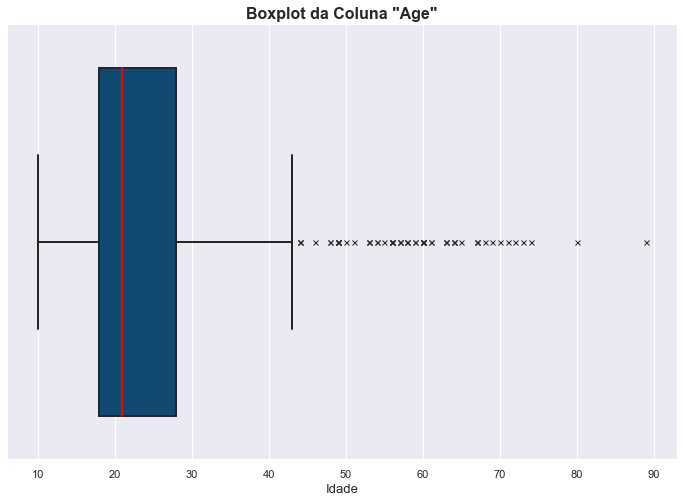

In [72]:
# Plotando:
sns.boxplot(data=data, x='Age', flierprops={"marker": "x"}, 
            color='#004d80', medianprops={"color": "red"}, linewidth=2)

plt.title('Boxplot da Coluna "Age"', loc="center", 
           fontsize=16, fontweight='bold')
           
plt.xlabel('Idade', fontsize=13)
plt.show()

De acordo com o boxplot e também pelo exposto pelo método describe, temos a média de idade em 21 anos e o limite do quarto quantil 28 anos. Acima de por volta de 43 anos de idade temos diversos outliers, porém, é esperado que pessoas acima dessa idade também participem da pesquisa.

No entanto, notamos um gap após de alguns regustros acima de 70 anos que são dados tão esparços que serão retirados. 

In [73]:
# Calculando quantos registros estão acima de 70 anos:
print('Registros acima de 70 anos:')
print(f'{len(data[data["Age"] > 70])} entradas.')
print("{:.2f}%".format((len(data[data['Age'] > 70]) / data.shape[0]) * 100))

Registros acima de 70 anos:
6 entradas.
0.82%


In [74]:
# Criando a variável que conterá os dados para remoção:
age_outliers_viz = data.query('Age > 70')
age_outliers_viz

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
428,8/30/2022 17:43:36,72.0,Spotify,6.00,Yes,Yes,Yes,Rock,No,No,...,Very frequently,Never,Very frequently,Never,0.0,1.0,0.0,2.0,Improve,I understand.
429,8/30/2022 18:15:39,73.0,Pandora,3.00,Yes,No,No,R&B,Yes,Yes,...,Very frequently,Sometimes,Sometimes,Never,5.0,4.0,0.0,1.0,Improve,I understand.
490,9/1/2022 19:44:33,71.0,I do not use a streaming service.,0.25,Yes,No,No,Gospel,No,Yes,...,Rarely,Never,Rarely,Never,1.0,0.0,0.0,0.0,Improve,I understand.
494,9/1/2022 21:07:33,74.0,I do not use a streaming service.,1.00,No,No,No,Pop,No,No,...,Sometimes,Never,Sometimes,Never,4.0,2.0,1.0,0.0,Improve,I understand.
527,9/2/2022 14:09:04,80.0,I do not use a streaming service.,3.00,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,7.0,3.0,9.0,2.0,Improve,I understand.
695,9/28/2022 17:25:48,89.0,Spotify,24.00,Yes,Yes,Yes,Rap,No,No,...,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect,I understand.


## Limpeza e Transformação dos Dados

Após conhecermos melhor as caracteríticas do nosso Dataset e de compreender a situações dos valores outliers, partiremos para a etapa de limpeza e transformação dos dados, onde iremos deixar os dados na melhor forma possível para as visualizações gráficas posteriores. Como etapas teremos:

- Remoção das colunas `Timestamp` e `Permissions` pois não serão necessárias para as análises;

- Remoção dos outliers constatados na etapa anterior;

- Preencher valores nulos;

- Alterar Data types necessários.

In [75]:
# Criação de uma cópia do Dataset para limpeza:
data_clean = data.copy()

In [76]:
# Remoção das colunas Timestamp e Permissions:
data_clean = data_clean.drop(['Timestamp', 'Permissions'], axis=1)

- Remoção dos outliers:

In [77]:
# Coluna 'Age':
age_outliers = data_clean[(data_clean['Age'] > 70)].index
data_clean = data_clean.drop(age_outliers, axis=0)

# Coluna 'BPM':
bpm_outliers = data_clean[(data_clean['BPM'] > 180)].index
data_clean = data_clean.drop(bpm_outliers, axis=0)

# Coluna 'Hours per day':
hpd_outliers = data_clean[(data_clean['Hours per day'] > 12)].index
data_clean = data_clean.drop(hpd_outliers, axis=0)

In [78]:
# Checando shape do dataset:
data_clean.shape

(693, 31)

- Remoção de valores nulos:

In [79]:
# Checando quantos valores nulos existem em cada coluna:
df = pd.DataFrame(data_clean.isnull().sum())
df.reset_index()

,index,0
0,Age,1
1,Primary streaming service,1
2,Hours per day,0
3,While working,2
4,Instrumentalist,4
5,Composer,1
6,Fav genre,0
7,Exploratory,0
8,Foreign languages,4
9,BPM,105


Para tratar os valores nulos, iremos preencher os campos vazios com os valores que mais aparecem no Dataset, ou seja, iremos utilizar a moda das colunas para realizar o preenchimento, pegando os valores que mais apareceram nos dados e utilizando eles para preencher os nulos. Por serem os valores mais comuns, são os mais 'prováveis' de terem sido a resposta desses valores nulos.

Apenas na coluna Age que iremos utilizar a média, pois é uma coluna numérica.

A coluna BPM, por mais que seja numérica, possui a média e a moda praticamente iguais em 120, então nesse caso utilizaremos a moda como forma de preenchimento.

In [80]:
# Checando a média da coluna Age e as modas das outras colunas:
print(f'Média da coluna Age: {round(data_clean["Age"].mean(), 0)}')
print(f'Moda da coluna Primary streaming service: {data_clean["Primary streaming service"].mode()[0]}')
print(f'Moda da coluna While Working: {data_clean["While working"].mode()[0]}')
print(f'Moda da coluna Instrumentalist: {data_clean["Instrumentalist"].mode()[0]}')
print(f'Moda da coluna Composer: {data_clean["Composer"].mode()[0]}')
print(f'Moda da coluna Foreign Languages: {data_clean["Foreign languages"].mode()[0]}')
print(f'Moda da coluna Music effects: {data_clean["Music effects"].mode()[0]}')
print(f'Moda da coluna BPM: {data_clean["BPM"].mode()[0]}')
print(f'Média da coluna BPM: {round(data_clean["BPM"].mean(), 1)}')


Média da coluna Age: 25.0
Moda da coluna Primary streaming service: Spotify
Moda da coluna While Working: Yes
Moda da coluna Instrumentalist: No
Moda da coluna Composer: No
Moda da coluna Foreign Languages: Yes
Moda da coluna Music effects: Improve
Moda da coluna BPM: 120.0
Média da coluna BPM: 119.6


In [81]:
# Coluna Age sendo preenchida com a média de idade (25 anos arrendodados):
data_clean['Age'] = data_clean['Age'].fillna(
    round(data_clean['Age'].mean(), 0))

# Coluna Primary streaming service preenchida com a moda (Spotify):
data_clean['Primary streaming service'] = data_clean['Primary streaming service'].fillna(
    data['Primary streaming service'].mode()[0])

# Coluna While Working preenchida com a moda (Yes):
data_clean['While working'] = data_clean['While working'].fillna(
    data_clean['While working'].mode()[0])

# Coluna Instrumentalist preenchida com a moda (No):
data_clean['Instrumentalist'] = data_clean['Instrumentalist'].fillna(
    data_clean['Instrumentalist'].mode()[0])

# Coluna Composer preenchida com a moda (No):
data_clean['Composer'] = data_clean['Composer'].fillna(
    data_clean['Composer'].mode()[0])

# Coluna Foreign Languages preenchida com a moda (Yes):
data_clean['Foreign languages'] = data_clean['Foreign languages'].fillna(
    data_clean['Foreign languages'].mode()[0])

# Coluna Music Effects preenchida com a moda (Improve):
data_clean['Music effects'] = data_clean['Music effects'].fillna(
    data_clean['Music effects'].mode()[0])

# Coluna BPM preenchida com a moda/média arredondada (120):
data_clean['BPM'] = data_clean['BPM'].fillna(
    data_clean['BPM'].mode()[0]
)

- Alterando Data Types necessários:

In [83]:
# Coluna Age para int8:
data_clean['Age'] = data_clean['Age'].astype('int8')

# Coluna BPM para int16:
data_clean['BPM'] = data_clean['BPM'].astype('int16')

Vamos realizar uma última checagem nos Data Types e nos registros do Dataset:

In [86]:
# Checando dtypes:
data_clean.dtypes.value_counts()

object     24
float64     5
int8        1
int16       1
dtype: int64

In [87]:
# Checando registros:
data_clean.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,119,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve
2,18,Spotify,4.0,No,No,No,Video game music,No,Yes,132,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


## Análises e Gráficos

Com os dados devidamente limpos e organizados, podemos dar início as análises e plotagens gráficas. Reiterando que um dos objetivos desse projeto é o de aprimorar minhas habilidades com plots de gráficos utilizando Seaborn e Matplotlib, então tentarei utilizar de diversos recursos gráficos nas análises, por mais que possam não ser 100% adequados ou necessários para situações específicas (uma simples tabela pode ser uma melhor opção de visualização as vezes).

Como primeira análise, vamos identificar a distribuição de idades dos participantes da pesquisa utilizando Histogramas:

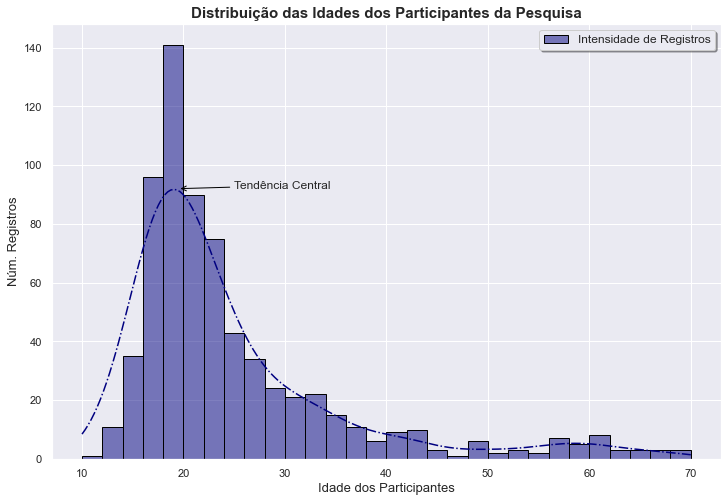

In [110]:
sns.histplot(data=data_clean, x='Age', color='navy', binwidth=2, label='Intensidade de Registros', 
             kde=True, alpha=.5, line_kws={'linestyle':'dashdot'}, edgecolor='black')

# Formatação de títulos e labels:
plt.title('Distribuição das Idades dos Participantes da Pesquisa', fontsize=15, fontweight='bold')
plt.xlabel('Idade dos Participantes', fontsize=13)
plt.ylabel('Núm. Registros', fontsize=13)
plt.annotate('Tendência Central', fontsize=12, xy=(19.5,92), 
              xytext=(25,92), arrowprops={'arrowstyle':'->', 'color':'black'})

# Plotando:
plt.legend(fontsize=12, fancybox=True, shadow=True)
plt.show()

Os registros de idade tendem a esquerda onde se agrupam em maior quantidade por volta dos 18 anos de idade, porém temos um range grande de idades (indo até 70 anos) dessa forma, é interessante avaliarmos quais são as características desses grupos etários.

Para isso, iremos dividir as idades entre:
- Jovens: até 19 anos;

- Adultos: entre 20 e 59 anos;

- Idosos: a partir de 60 anos.

Para facilitar o processo de plotagem, vamos criar uma nova coluna no nosso Dataset informando qual a faixa etária do indivíduo:

In [111]:
# Pegando valor mínimo e máximo da idade:
print(f'Idade mínima: {data_clean["Age"].min()}')
print(f'Idade máxima: {data_clean["Age"].max()}')

Idade mínima: 10
Idade máxima: 70


In [120]:
# Realizando a divisão de grupos de idade:
data_clean['Age group'] = pd.cut(data_clean['Age'], bins=[9, 19, 59, 70],
                                 labels=['Jovem', 'Adulto', 'Idoso'])

In [125]:
# Checando coluna:
data_clean['Age group'].value_counts()

Adulto    389
Jovem     284
Idoso      20
Name: Age group, dtype: int64

Com as faixas etárias definidas, vamos conferir quais os principais meios de streaming entre elas:

In [154]:
# Agrupando os dados pelo Age group e contagem dos streamings:
streaming_ages = data_clean.groupby('Age group', as_index=False)[
                                    ['Primary streaming service']].value_counts()

# Ajeitando nome da nova coluna:
streaming_ages = streaming_ages.rename(columns={'count':'quantity'})
streaming_ages

,Age group,Primary streaming service,quantity
0,Jovem,Spotify,200
1,Jovem,YouTube Music,31
2,Jovem,Apple Music,20
3,Jovem,Other streaming service,17
4,Jovem,I do not use a streaming service.,15
5,Jovem,Pandora,1
6,Adulto,Spotify,227
7,Adulto,YouTube Music,57
8,Adulto,I do not use a streaming service.,47
9,Adulto,Other streaming service,28


In [174]:
# Dividindo os dados nas 3 faixas etárias:
jovens = pd.DataFrame(streaming_ages.query('`Age group` == "Jovem"'))
adultos = pd.DataFrame(streaming_ages.query('`Age group` == "Adulto"'))
idosos = pd.DataFrame(streaming_ages.query('`Age group` == "Idoso"'))

- Streaming services utilizados pelos jovens (utilizando Seaborn barchart):

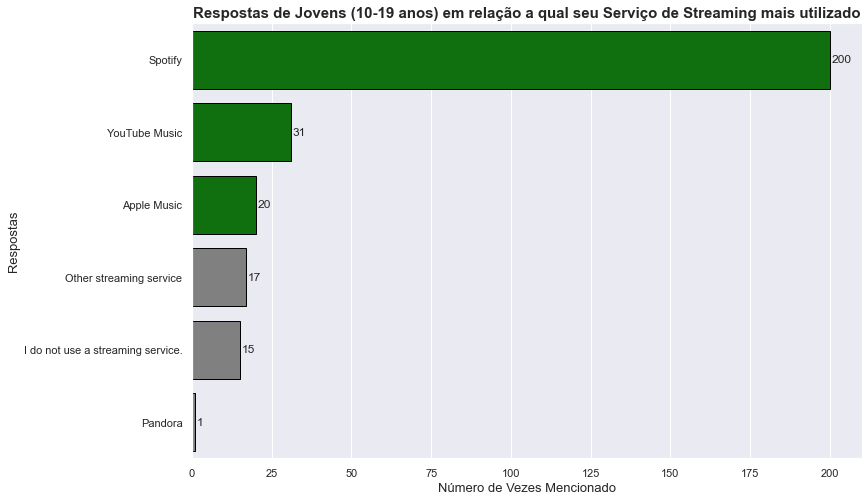

In [230]:
# Barplot dos jovens:
colors = ['grey' if (x < 20) else 'green' for x in jovens.quantity]

ax = sns.barplot(x='quantity', y='Primary streaming service', data=jovens, edgecolor='black',
                 palette=colors)

# Definindo for loop para criação de valores ao final das barras:
for i in ax.containers:
    ax.bar_label(i, padding=2)

# Estilizando:
plt.title(
    'Respostas de Jovens (10-19 anos) em relação a qual seu Serviço de Streaming mais utilizado', 
    fontsize=15, fontweight='bold'
    )
plt.xlabel('Número de Vezes Mencionado', fontsize=13)
plt.ylabel('Respostas', fontsize=13)
plt.show()

- Streaming services utilizados pelos Adultos (utilizando pieplot):

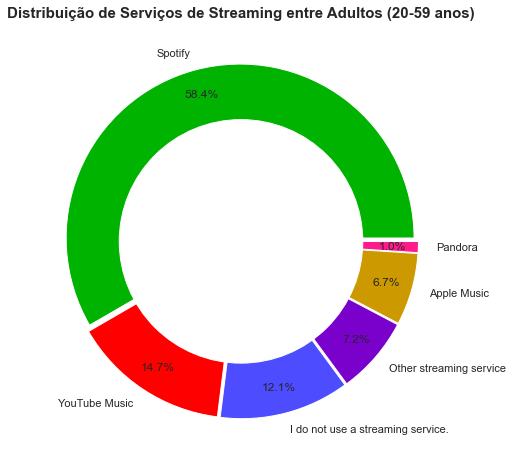

In [255]:
# Valores:
quantity = list(adultos['quantity'].values)

# Labels:
services = list(adultos['Primary streaming service'].values)

# Cores:
colors = ['#00b300', '#ff0000', '#4d4dff', '#7a00cc', '#cc9900', '#ff1a8c']

# Espaçamento entre fatias:
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)

# Plotando o pie chart:
plt.pie(quantity, labels=services, colors=colors, 
        autopct='%1.1f%%', pctdistance=0.85, explode=explode)

# Desenhando círculo central:
circulo = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()

# Inserindo círculo no pie chart:
fig.gca().add_artist(circulo)

# Adicionando título:
plt.title('Distribuição de Serviços de Streaming entre Adultos (20-59 anos)', fontsize=15, fontweight='bold')

plt.show()

- Streaming services utilizados pelos idosos (barchart com paleta):

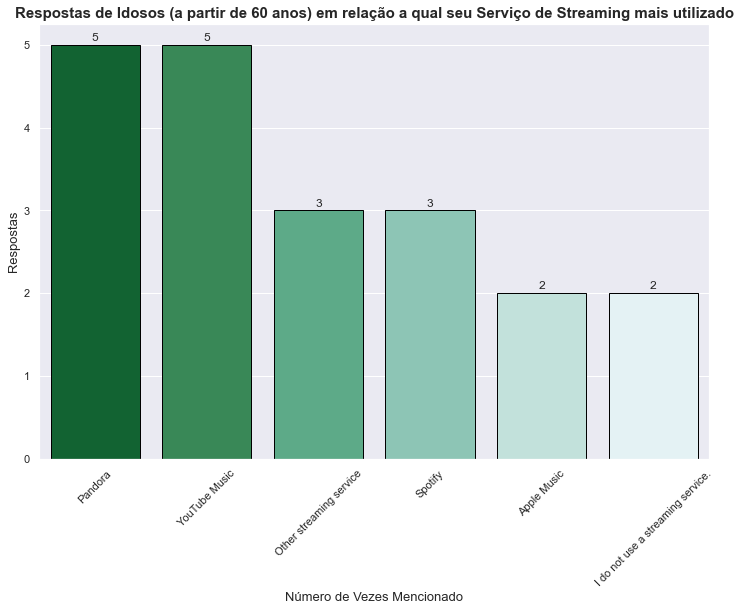

In [261]:
# Barplot dos idosos:
ax = sns.barplot(x='Primary streaming service', y='quantity', data=idosos, edgecolor='black',
                 palette='BuGn_r')

# Definindo for loop para criação de valores ao final das barras:
for i in ax.containers:
    ax.bar_label(i, padding=2)

# Estilizando:
plt.title(
    'Respostas de Idosos (a partir de 60 anos) em relação a qual seu Serviço de Streaming mais utilizado', 
    fontsize=15, fontweight='bold'
    )
plt.xlabel('Número de Vezes Mencionado', fontsize=13)
plt.ylabel('Respostas', fontsize=13)
plt.xticks(rotation=45)
plt.show()